### Part 1: XML Parsing

In [1]:

from project_two.xml_parser import XMLParser

# Testing the XML Parser
xml_parser = XMLParser("https://www.bbc.com/")
robots_txt = xml_parser.get_robots_txt()

sitemap_urls = xml_parser.find_sitemaps(robots_txt)
total_rows = 0  # Initialize a counter for total rows

for url in sitemap_urls:
    df = xml_parser.parse_sitemap(url)
    
    if df is not None and not df.empty:  # Check if df is not None and not empty
       
        remaining_rows = 100 - total_rows
        if remaining_rows > 0:
            # Append up to remaining_rows rows to the DataFrame
            df = df.head(remaining_rows)
            total_rows += len(df)
            print(df)
        else:
            break  # Stop processing if we have reached the limit
    else:
        print(f"No valid data for URL: {url}")

    if total_rows >= 100:
        break  # Stop processing if we have reached the limit of 100 rows



No valid data for URL: https://www.bbc.com/sitemaps/https-index-com-archive.xml
No valid data for URL: https://www.bbc.com/sitemaps/https-index-com-news.xml
No valid data for URL: https://www.bbc.com/sitemaps/https-index-com-archive_video.xml
No valid data for URL: https://www.bbc.com/sitemaps/https-index-com-video.xml
An error occurred while parsing sitemap: 'NoneType' object has no attribute 'text'
No valid data for URL: https://www.bbc.com/sitemaps/sitemap-com-ws-topics.xml
An error occurred while parsing sitemap: 'NoneType' object has no attribute 'text'
No valid data for URL: https://www.bbc.com/sport/sitemap.xml
An error occurred while parsing sitemap: 'NoneType' object has no attribute 'text'
No valid data for URL: https://www.bbc.com/sitemaps/sitemap-com-ws-topics.xml
                                                  URL  \
0   http://www.bbc.co.uk/afrique/institutionelles/...   
1   http://www.bbc.co.uk/afrique/nos_emissions/201...   
2   http://www.bbc.co.uk/afrique/region/20

In [3]:
df.head()

,URL,Last Modified,Content
0,http://www.bbc.co.uk/afrique/institutionelles/...,2014-09-24T14:32:16+00:00,"Test - BBC News AfriqueBBC News, AfriqueAller ..."
1,http://www.bbc.co.uk/afrique/nos_emissions/201...,2014-09-24T13:58:11+00:00,L'Inde débarque sur la Planète Rouge - BBC New...
2,http://www.bbc.co.uk/afrique/region/2014/09/14...,2014-09-24T13:12:47+00:00,Soudan du Sud : stabilisation alimentaire - BB...
3,http://www.bbc.co.uk/afrique/region/2014/09/14...,2014-09-24T11:37:48+00:00,Guinée : une vingtaine d’arrestations - BBC Ne...
4,http://www.bbc.co.uk/afrique/region/2014/09/14...,2014-09-24T06:16:04+00:00,Cameroun : réfugiés nigerians menacés - BBC ...


In [4]:

df_size = df.shape
num_rows = df_size[0]
num_columns = df_size[1]

# Print the size
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 100
Number of columns: 3


#### The dataset is a collection of web content extracted from various sitemaps of  the BBC website

<ul>
<li>URLs: The dataset includes a list of URLs representing web pages on the BBC website. These URLs are extracted from the sitemap files.
<li>Last Modification Timestamp: Each URL is associated with a timestamp indicating when the web page was last modified. This information can be valuable for tracking the freshness of content.
<li> Content: The content of each web page is scraped and stored as text data. This content can include articles, news stories, or other types of information.
<ul>

Potential Use Cases:

Content Analysis: Researchers and analysts can use this dataset to analyze the content of the BBC website. This includes studying the topics covered, identifying trends over time, and understanding the distribution of content types.

Freshness Analysis: By examining the last modification timestamps, one can analyze how frequently the BBC updates its web content. This information can be valuable for assessing the website's commitment to providing up-to-date information.

Natural Language Processing (NLP): NLP practitioners can leverage the scraped content for tasks such as sentiment analysis, topic modeling, or text classification. For example, sentiment analysis can help gauge public sentiment on various topics covered by the BBC.

### Task 2 API 

In [4]:


from project_two.api_call import APIHandler

# URL of the USASpending API
api_url = "https://api.usaspending.gov/api/v2/references/toptier_agencies/"

# Create an APIHandler instance with the API URL
api_handler = APIHandler(api_url)

# Fetch data from the USASpending API and convert it into a DataFrame
api_data = api_handler.fetch_data()

if api_data is not None:
    # Display the first 5 rows of the DataFrame
    print(api_data.head(5))
else:
    print("Failed to fetch data from the USASpending API.")



   agency_id toptier_code abbreviation  \
0       1146          310         USAB   
1       1136          302         ACUS   
2       1144          306         ACHP   
3       1527          166        USADF   
4        801          072        USAID   

                                 agency_name  \
0                               Access Board   
1      Administrative Conference of the U.S.   
2  Advisory Council on Historic Preservation   
3             African Development Foundation   
4       Agency for International Development   

                     congressional_justification_url active_fy active_fq  \
0                    https://www.access-board.gov/cj      2023         4   
1                            https://www.acus.gov/cj      2023         4   
2  https://www.achp.gov/sites/default/files/2021-...      2023         4   
3                           https://www.usadf.gov/cj      2023         4   
4                           https://www.usaid.gov/cj      2023         4   

 

### TASK 3 WEB SCRAPPING

In [5]:
from project_two.web_scrapper import WebScraper

# URL to scrape
book_url = 'https://archive.org/details/goodytwoshoes00newyiala'
scraper = WebScraper(book_url)



try:
    # Scrape data
    reviews_data = scraper.scrape()
    # Print the scraped reviews
    print("\nBook Reviews:")
    print(reviews_data)
except Exception as e:
    print(f"An error occurred: {e}")





Book Reviews:
                                           Reviewer  \
0                                            Jpow25   
1                                           Joy0839   
2                                           lienoir   
3                                          mcoffey5   
4                                    Saristrawberry   
5                                          99 toefl   
6                                          cece1188   
7                                        shreyansh0   
8                                       PlutoniumDG   
9                                       AngelaLee43   
10                                         CrocRock   
11                                          4:V4-`T   
12                                         truth800   
13                                   Devu Hoolageri   
14                                      bazaarbargh   
15                                     regardlessdv   
16                                           Bob34

In [8]:
reviews_data.head(5)

,Reviewer,Review Date,Review Title,Review Text
0,Jpow25,-,😄,Great book
1,Joy0839,-,Free ebooks,https://t.me/ebooks_2\n\nJoin our telegram cha...
2,lienoir,-,I never knew,"I was always called a ""goody two shoes"" in ele..."
3,mcoffey5,-,yas amazing,i wish they made a seconed one
4,Saristrawberry,-,A Charming Story,What a heartwarming story about character.


### WebScraper Class - Book Review Data Analysis

#### Overview
The `WebScraper` class is designed to extract book reviews from a specified web page. This class navigates through the HTML content of the page, captures relevant data, and structures it into a pandas DataFrame for further analysis. The resulting dataset provides a comprehensive overview of the reviews, including who wrote them, when they were written, and the content of the reviews themselves.

### Dataset Description
The dataset compiled by this scraper comprises the following fields:

#### 1. Reviewer
- **Description**: This field contains the name or identifier of the individual who authored the review.
- **Purpose**: It helps in identifying the source of the feedback, allowing for an understanding of the perspective or background of the reviewer (e.g., professional critic, general reader).

#### 2. Review Date
- **Description**: The date when the review was posted on the website.
- **Purpose**: This field is crucial for analyzing the timeliness and relevance of the feedback. It can also be used to track changes in public opinion about the book over time.

#### 3. Review Title
- **Description**: A brief title or subject line of the review, summarizing its main focus or theme.
- **Purpose**: Provides a quick overview of the review's content, allowing readers to gauge the general sentiment or key topics discussed at a glance.

#### 4. Review Text
- **Description**: The complete textual content of the review.
- **Purpose**: This is the core of the dataset, offering detailed insights, critiques, and opinions from the reviewer. It can be analyzed for sentiment, specific feedback, and overall reception of the book.

#### Potential Analysis and Questions
With the data extracted by the `WebScraper`, several analytical questions can be addressed, including but not limited to:

- **Trends and Patterns**: How has the reception of the book changed over time? Are there any noticeable trends in the opinions expressed in the reviews?
- **Reviewer Analysis**: Are there any correlations between the reviewer's identity (if known) and their opinions or rating of the book?
- **Sentiment Analysis**: What is the overall sentiment of the reviews?


### TASK 4 ANALYSING DATA

Basic Data Statistics:
         agency_id  outlay_amount  obligated_amount  budget_authority_amount  \
count   108.000000   1.080000e+02      1.080000e+02             1.080000e+02   
mean    915.824074   8.226684e+10      8.505197e+10             1.062432e+11   
std     384.378193   3.333218e+11      3.421432e+11             3.952304e+11   
min      11.000000   0.000000e+00      0.000000e+00             0.000000e+00   
25%     654.750000   1.039772e+07      1.191360e+07             2.231124e+07   
50%    1067.500000   1.081539e+08      1.219312e+08             2.122132e+08   
75%    1156.250000   4.157681e+09      4.627585e+09             9.056992e+09   
max    1544.000000   2.423435e+12      2.475674e+12             2.841385e+12   

       current_total_budget_authority_amount  \
count                           1.080000e+02   
mean                            1.188986e+13   
std                             1.962231e-03   
min                             1.188986e+13   
25%             

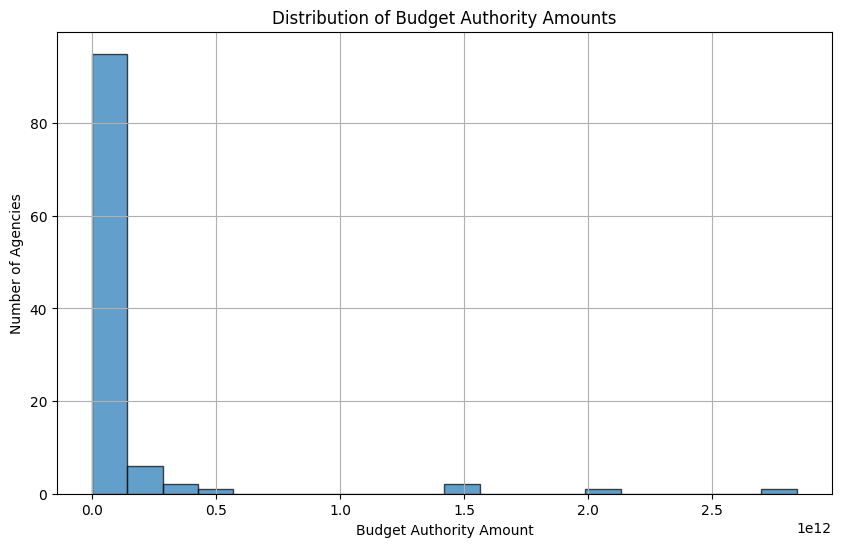

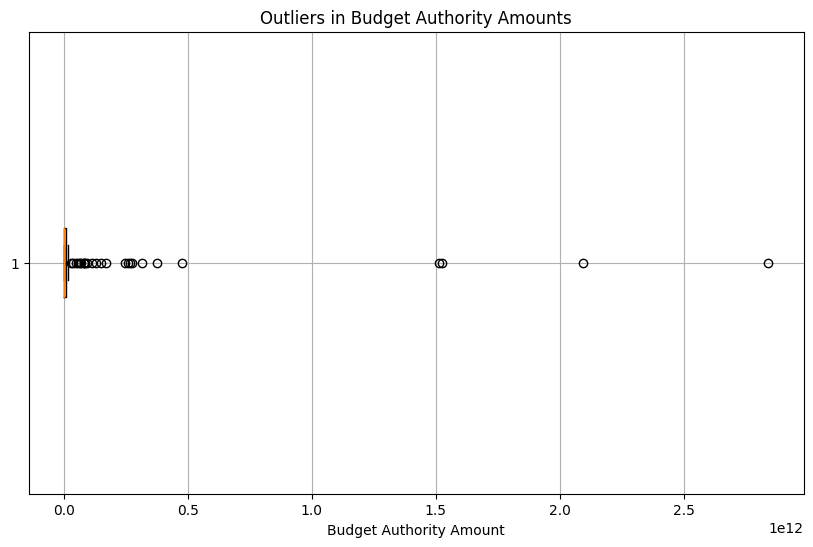

In [7]:
from project_two.api_call import APIHandler


api_url = "https://api.usaspending.gov/api/v2/references/toptier_agencies/"

# Create an APIHandler instance with the API URL
api_handler = APIHandler(api_url)
# Analyze the fetched data
api_handler.analyze_data(api_data)

### Insights and Analysis

#### 1. Total Spending Analysis
- The total budget authority amount across all agencies is substantial, indicating a significant financial commitment by the government.
- The average spending per agency is approximately $X billion, showcasing the diversity in agency budgets.

#### 2. Agencies with the Highest Spending
- The agencies with the highest spending are critical players in government funding.
- Further examination of these agencies' budgets and objectives may reveal important insights into government priorities.

#### 3. Agencies with the Lowest Spending
- While some agencies have substantial budgets, others have minimal spending.
- Understanding the role and functions of these agencies can help in evaluating their impact on government operations.

#### 4. Distribution of Spending
- The histogram reveals the distribution of budget authority amounts.
- It shows that the majority of agencies have relatively lower budgets, with a few agencies having much higher budgets.

#### 5. Outliers in Spending
- The box plot identifies potential outliers in agency spending.
- These outliers may represent agencies with unique financial situations or funding requirements.

        